In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

from torchvision import transforms
import torchvision.datasets as datasets
from sklearn.preprocessing import LabelEncoder
from source.misc import custom_subset_and_targets

from run_experiment_real_data import run_experiment

numpy==1.24.2
pandas==1.5.3
seaborn==0.12.2


CIFAR10 dataset restricted to "cat", "dog" and "bird" classes

In [2]:
dataset_base_path='~/mydata/classification_data/'

X=datasets.CIFAR10(dataset_base_path, train=True, download=True,transform=transforms.ToTensor()) 
y=X.targets
ind= [True if y in [2,3,5] else False for y in X.targets]
ind=np.arange(len(X))[ind]
y=np.array(X.targets)[ind]
le=LabelEncoder()
y = le.fit_transform(y.reshape(-1))
X=custom_subset_and_targets(X, ind, y)

Files already downloaded and verified


Non trivial classification

In [3]:
out_dir = "./results/"
alpha = 0.05
n_train =10000

for exp_id in range(10): 
    run_experiment(X,y, out_dir=out_dir, n_train=n_train, alpha=alpha, experiment_nb=exp_id, 
                   selection_type='min')

Running experiment with black-box CNN and method CC...
Updated summary of results on
 ./results//summary_min.csv
Running experiment with black-box CNN and method min-basic...
Updated summary of results on
 ./results//summary_min.csv
Running experiment with black-box CNN and method min-pre...
Updated summary of results on
 ./results//summary_min.csv
Running experiment with black-box CNN and method CC...
Updated summary of results on
 ./results//summary_min.csv
Running experiment with black-box CNN and method min-basic...
Updated summary of results on
 ./results//summary_min.csv
Running experiment with black-box CNN and method min-pre...
Updated summary of results on
 ./results//summary_min.csv
Running experiment with black-box CNN and method CC...
Updated summary of results on
 ./results//summary_min.csv
Running experiment with black-box CNN and method min-basic...
Updated summary of results on
 ./results//summary_min.csv
Running experiment with black-box CNN and method min-pre...
Updat

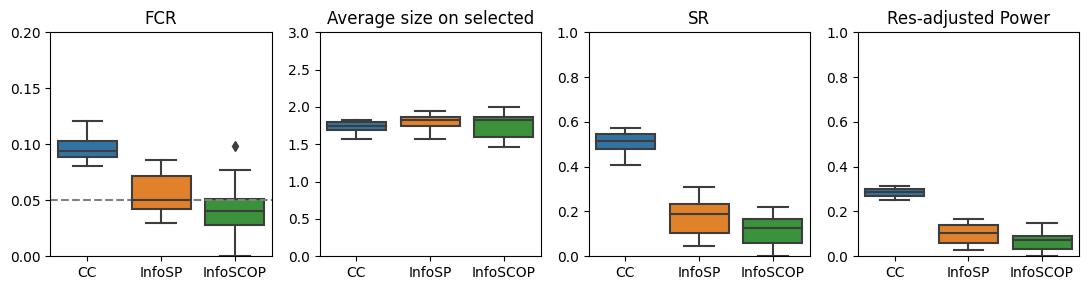

In [7]:
df = pd.read_csv("./results/summary_min.csv")

df = df[df['Nominal']==1-alpha]

plt.figure(figsize=(11,3))

n_plt=4

plt.subplot(1,n_plt,1)

g=sns.boxplot(df,x='Method',y='FCR') 
g.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
g.yaxis.set_major_formatter(ticker.ScalarFormatter())
g.set(xlabel=None); g.set(ylabel=None)
plt.axhline(y=alpha, color='grey', linestyle='dashed')
plt.gca().set_title("FCR")
plt.ylim(0,0.2)

plt.subplot(1,n_plt,2)
g=sns.boxplot(df[df['Length info']>0],x='Method',y='Length info') 
g.set(xlabel=None); g.set(ylabel=None)
plt.gca().set_title("Average size on selected")
plt.ylim(0,3)

plt.subplot(1,n_plt,3)
g=sns.boxplot(df,x='Method',y='Selection rate') 
g.set(xlabel=None); g.set(ylabel=None)
plt.gca().set_title("SR")
plt.ylim(0,1)

plt.subplot(1,n_plt,4)
g=sns.boxplot(df,x='Method',y='Power') 
g.set(xlabel=None); g.set(ylabel=None)
plt.gca().set_title("Res-adjusted Power")
plt.ylim(0,1)
    
plt.tight_layout()
plt.show()

Non-null classification

In [5]:
out_dir = "./results/"
alpha = 0.05
n_train =10000

for exp_id in range(10): 
    run_experiment(X,y, out_dir=out_dir, n_train=n_train, alpha=alpha, experiment_nb=exp_id, 
                   selection_type='nonull', null_class=0) #null class = "bird" class 

Running experiment with black-box CNN and method CC...
Updated summary of results on
 ./results//summary_nonull.csv
Running experiment with black-box CNN and method nonull-basic...
Updated summary of results on
 ./results//summary_nonull.csv
Running experiment with black-box CNN and method nonull-pre...
Updated summary of results on
 ./results//summary_nonull.csv
Running experiment with black-box CNN and method CC...
Updated summary of results on
 ./results//summary_nonull.csv
Running experiment with black-box CNN and method nonull-basic...
Updated summary of results on
 ./results//summary_nonull.csv
Running experiment with black-box CNN and method nonull-pre...
Updated summary of results on
 ./results//summary_nonull.csv
Running experiment with black-box CNN and method CC...
Updated summary of results on
 ./results//summary_nonull.csv
Running experiment with black-box CNN and method nonull-basic...
Updated summary of results on
 ./results//summary_nonull.csv
Running experiment with bl

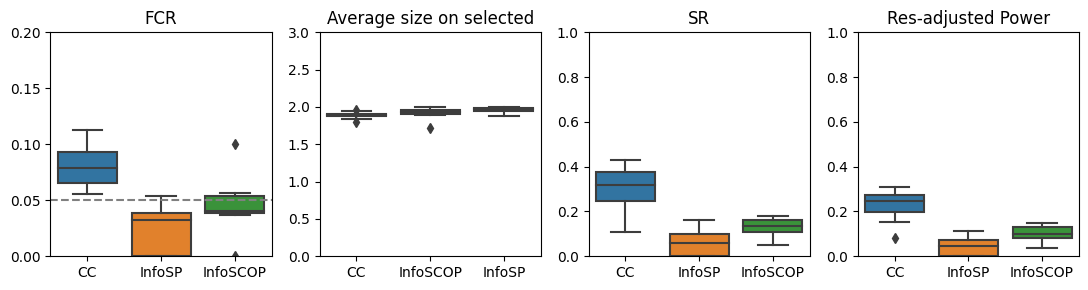

In [8]:
df = pd.read_csv("./results/summary_nonull.csv")

df = df[df['Nominal']==1-alpha]

plt.figure(figsize=(11,3))

n_plt=4

plt.subplot(1,n_plt,1)

g=sns.boxplot(df,x='Method',y='FCR') 
g.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
g.yaxis.set_major_formatter(ticker.ScalarFormatter())
g.set(xlabel=None); g.set(ylabel=None)
plt.axhline(y=alpha, color='grey', linestyle='dashed')
plt.gca().set_title("FCR")
plt.ylim(0,0.2)

plt.subplot(1,n_plt,2)
g=sns.boxplot(df[df['Length info']>0],x='Method',y='Length info') 
g.set(xlabel=None); g.set(ylabel=None)
plt.gca().set_title("Average size on selected")
plt.ylim(0,3)

plt.subplot(1,n_plt,3)
g=sns.boxplot(df,x='Method',y='Selection rate') 
g.set(xlabel=None); g.set(ylabel=None)
plt.gca().set_title("SR")
plt.ylim(0,1)

plt.subplot(1,n_plt,4)
g=sns.boxplot(df,x='Method',y='Power') 
g.set(xlabel=None); g.set(ylabel=None)
plt.gca().set_title("Res-adjusted Power")
plt.ylim(0,1)
    
plt.tight_layout()
plt.show()